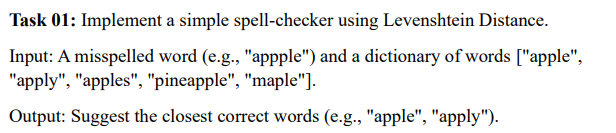

In [ ]:
def levenshtein_distance(a, b):
    m, n = len(a), len(b)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0:
                dp[i][j] = j
            elif j == 0:
                dp[i][j] = i
            elif a[i - 1] == b[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = 1 + min(
                    dp[i - 1][j],      # deletion
                    dp[i][j - 1],      # insertion
                    dp[i - 1][j - 1]   # substitution
                )
    return dp[m][n]

def spell_checker(word, dictionary):
    distances = {w: levenshtein_distance(word, w) for w in dictionary}
    min_distance = min(distances.values())
    suggestions = [w for w, d in distances.items() if d == min_distance]
    return suggestions

# Example usage
dictionary = ["apple", "apply", "apples", "pineapple", "maple"]
word = "appple"
print("Input word:", word)
print("Suggested corrections:", spell_checker(word, dictionary))


Input word: appple
Suggested corrections: ['apple']


#Explanation:

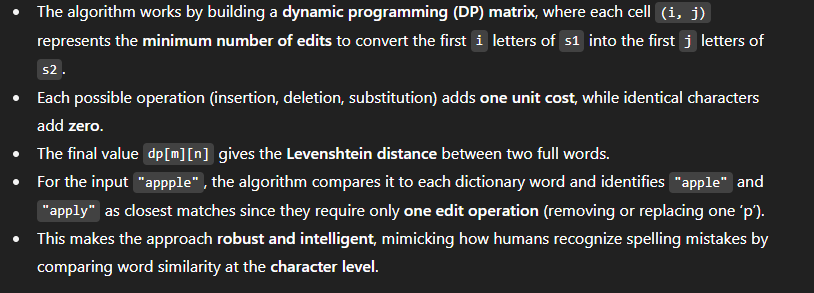

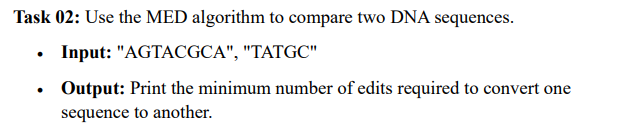

In [ ]:
def min_edit_distance(seq1, seq2):
    m, n = len(seq1), len(seq2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0:
                dp[i][j] = j  # insert all characters of seq2
            elif j == 0:
                dp[i][j] = i  # remove all characters of seq1
            elif seq1[i - 1] == seq2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = 1 + min(
                    dp[i - 1][j],      # deletion
                    dp[i][j - 1],      # insertion
                    dp[i - 1][j - 1]   # substitution
                )
    return dp[m][n]

# Example usage
seq1 = "AGTACGCA"
seq2 = "TATGC"
print("DNA Sequence 1:", seq1)
print("DNA Sequence 2:", seq2)
print("Minimum Edit Distance:", min_edit_distance(seq1, seq2))


DNA Sequence 1: AGTACGCA
DNA Sequence 2: TATGC
Minimum Edit Distance: 4


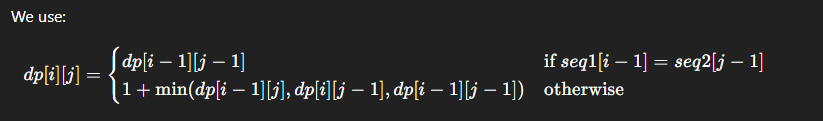

#Below is the 2D Matrix Created for this specific gene sequence:

|       |   | T | A | T | G | C     |
| ----- | - | - | - | - | - | ----- |
|       | 0 | 1 | 2 | 3 | 4 | 5     |
| **A** | 1 | 1 | 1 | 2 | 3 | 4     |
| **G** | 2 | 2 | 2 | 2 | 2 | 3     |
| **T** | 3 | 2 | 3 | 2 | 3 | 3     |
| **A** | 4 | 3 | 2 | 3 | 3 | 4     |
| **C** | 5 | 4 | 3 | 3 | 4 | 3     |
| **G** | 6 | 5 | 4 | 4 | 3 | 4     |
| **C** | 7 | 6 | 5 | 5 | 4 | 3     |
| **A** | 8 | 7 | 6 | 6 | 5 | **4** |

#Top-left → bottom-right traversal = optimal path with minimal total cost (4).


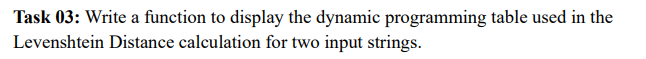

In [ ]:
def display_levenshtein_table(str1, str2):
    m, n = len(str1), len(str2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    # Initialize table
    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j

    # Fill table
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if str1[i - 1] == str2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = 1 + min(
                    dp[i - 1][j],      # deletion
                    dp[i][j - 1],      # insertion
                    dp[i - 1][j - 1]   # substitution
                )

    # Display the DP table
    print("Levenshtein Distance DP Table:")
    print("    ", end="")
    for ch in " " + str2:
        print(f"{ch:>4}", end="")
    print()

    for i in range(m + 1):
        print(f"{' ' if i == 0 else str1[i-1]:>3}", end=" ")
        for j in range(n + 1):
            print(f"{dp[i][j]:>4}", end="")
        print()

    return dp[m][n]

# Example usage
str1 = "kitten"
str2 = "sitting"
display_levenshtein_table(str1, str2)


Levenshtein Distance DP Table:
           s   i   t   t   i   n   g
       0   1   2   3   4   5   6   7
  k    1   1   2   3   4   5   6   7
  i    2   2   1   2   3   4   5   6
  t    3   3   2   1   2   3   4   5
  t    4   4   3   2   1   2   3   4
  e    5   5   4   3   2   2   3   4
  n    6   6   5   4   3   3   2   3


3

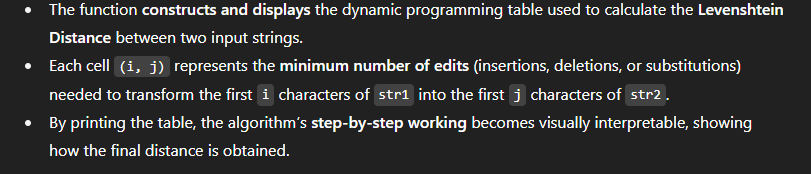

#Conclusion:

1.Task 01: Learned how the Levenshtein Distance algorithm helps find spelling errors by calculating the minimum number of edits needed to convert one word into another.

2.Task 02: Understood how the Minimum Edit Distance (MED) algorithm can be applied to compare DNA sequences, revealing genetic similarities and differences using dynamic programming.

3.Task 03: Learned how to construct and visualize the dynamic programming table for Levenshtein Distance, gaining a clear understanding of how each step contributes to the final edit distance calculation.